In [127]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import scipy.signal as signal

dados de simulacao

\dot{x}(t) = -2x(t)+bu(t)

x = (b/(s+2))u

In [128]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Dados de simulação
b = 3
num = [b]
den = [1, -2]  # Ajuste o sinal do coeficiente '2' para '-2' para representar o sistema correto
N = 300  # Número de amostras
dt = 0.01
T = np.linspace(0, N * dt, N + 1)
u = np.ones(int(N + 1))

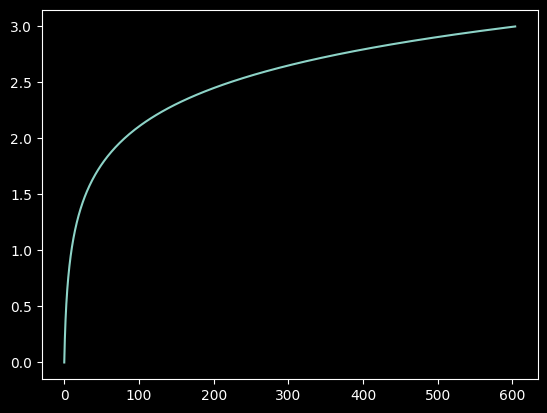

In [129]:
# fourier transform
ftx = signal.TransferFunction(num, den)

#  calcular a resposta do sistema e Y conterá a saída, T conterá o vetor de tempo correspondente 
# e _ (underscore) é usado para descartar a terceira saída que não é usada nesse caso
Y, T, _ = signal.lsim(ftx, u, T)
plt.plot(T, Y, label='y(t)')

In [130]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Algoritmo de identificação de parâmetros
teta = [0]
erro = [0]
ftx1 = signal.TransferFunction(1, den)
phi, T, _ = signal.lsim(ftx, u, T)

gama = 1000
ms = 10

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [131]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# de k = 1 até N de dt em dt
print(f'len phi: {len(phi)}, len T: {len(T)}, len Y: {len(Y)}, len teta: {len(teta)}, len erro: {len(erro)}')
for k in range(0, int(N)):

    y[k] = (b / (1 - np.exp(-2 * T[k])))  # Simulação da planta
    teta.append(teta[k] + gama * dt * ((Y[k] - teta[k] * phi[k]) / ms) * phi[k])
    erro.append(Y[k] - teta[k] * phi[k])


len phi: 301, len T: 301, len Y: 301, len teta: 1, len erro: 1
range(0, 300)
k: 0
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
k: 50
k: 51
k: 52
k: 53
k: 54
k: 55
k: 56
k: 57
k: 58
k: 59
k: 60
k: 61
k: 62
k: 63
k: 64
k: 65
k: 66
k: 67
k: 68
k: 69
k: 70
k: 71
k: 72
k: 73
k: 74
k: 75
k: 76
k: 77
k: 78
k: 79
k: 80
k: 81
k: 82
k: 83
k: 84
k: 85
k: 86
k: 87
k: 88
k: 89
k: 90
k: 91
k: 92
k: 93
k: 94
k: 95
k: 96
k: 97
k: 98
k: 99
k: 100
k: 101
k: 102
k: 103
k: 104
k: 105
k: 106
k: 107
k: 108
k: 109
k: 110
k: 111
k: 112
k: 113
k: 114
k: 115
k: 116
k: 117
k: 118
k: 119
k: 120
k: 121
k: 122
k: 123
k: 124
k: 125
k: 126
k: 127
k: 128
k: 129
k: 130
k: 131
k: 132
k: 133
k: 134
k: 135
k: 136
k: 137
k: 138
k: 139
k: 140
k: 141
k: 142
k: 143
k: 144
k: 145
k: 146
k: 1

C:\Users\felip\AppData\Local\Temp\ipykernel_18316\4154858638.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  y[k] = (b / (1 - np.exp(-2 * T[k])))  # Simulação da planta
C:\Users\felip\AppData\Local\Temp\ipykernel_18316\4154858638.py:8: RuntimeWarning: overflow encountered in scalar multiply
  teta.append(teta[k] + gama * dt * ((Y[k] - teta[k] * phi[k]) / ms) * phi[k])
C:\Users\felip\AppData\Local\Temp\ipykernel_18316\4154858638.py:9: RuntimeWarning: overflow encountered in scalar multiply
  erro.append(Y[k] - teta[k] * phi[k])
C:\Users\felip\AppData\Local\Temp\ipykernel_18316\4154858638.py:8: RuntimeWarning: invalid value encountered in scalar add
  teta.append(teta[k] + gama * dt * ((Y[k] - teta[k] * phi[k]) / ms) * phi[k])


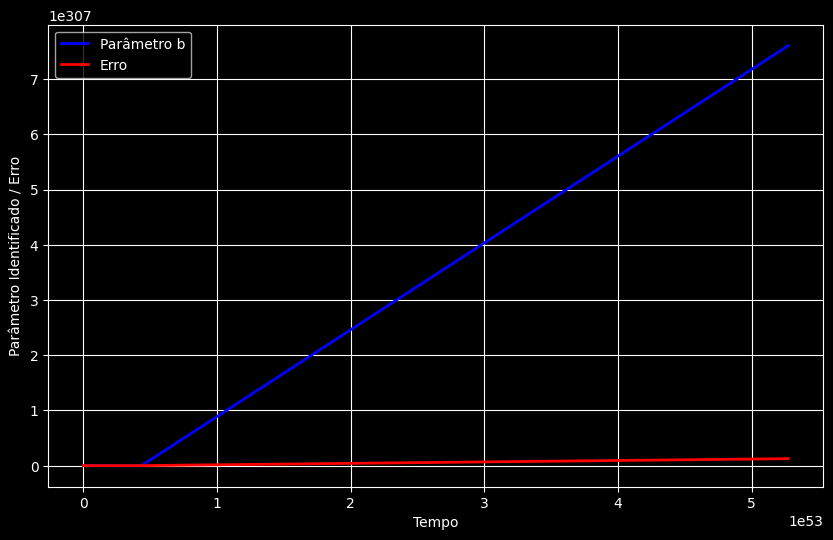

In [132]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Gráfico dos parâmetros identificados e do erro
plt.figure(figsize=(10, 6))
plt.plot(T, teta, 'b', linewidth=2, label='Parâmetro b')
plt.plot(T, erro, 'r', linewidth=2, label='Erro')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Parâmetro Identificado / Erro')
plt.grid(True)
plt.show()
